In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family']='serif' 
plt.rcParams['font.weight']='light'
plt.rcParams['font.size']=14
figsize = (15,5)

In [6]:
# Dimensions are ACTIVE, not fiducial

detLength = 1037/100. # in m
detHeight = 233/100. # in m
detWidth = 256/100. # in m
targDetDistance = 470 - (detLength) 

area = detHeight*detWidth
radius = np.sqrt(area/(2*np.pi))

def ThetaMax(l):
    thetaMax = np.arccos( (targDetDistance-l) / np.sqrt((targDetDistance-l)**2 + (radius)**2) )
    return thetaMax

def ProjectionFunction(x,theta):
    cond = (theta <= ThetaMax(x))
    ret = np.where(cond, 1, 0)
    return ret

thetaMax = ThetaMax(50)
cosThetaMax = np.cos(thetaMax)
print "Max Theta: %f rad / %f degrees" %(thetaMax, np.degrees(thetaMax))
print "Max CosTheta: %f" %cosThetaMax

Max Theta: 0.002379 rad / 0.136282 degrees
Max CosTheta: 0.999997


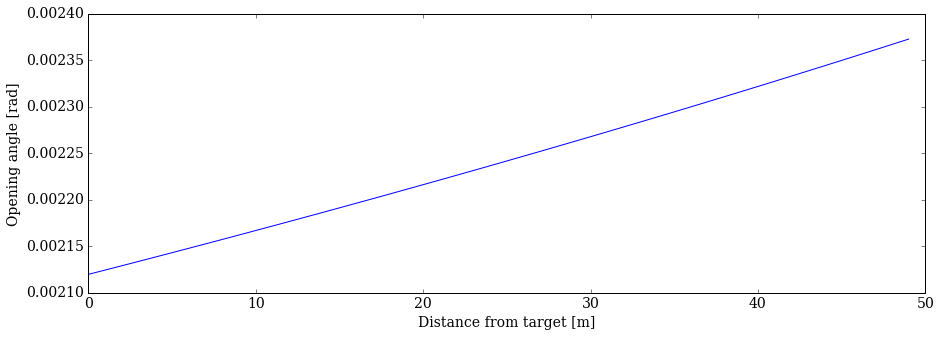

In [7]:
l = np.arange(50)
xlab = 'Distance from target [m]'
ylab = r'Opening angle [rad]'

plt.figure(figsize=figsize)
plt.plot(l,ThetaMax(l))
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.show()

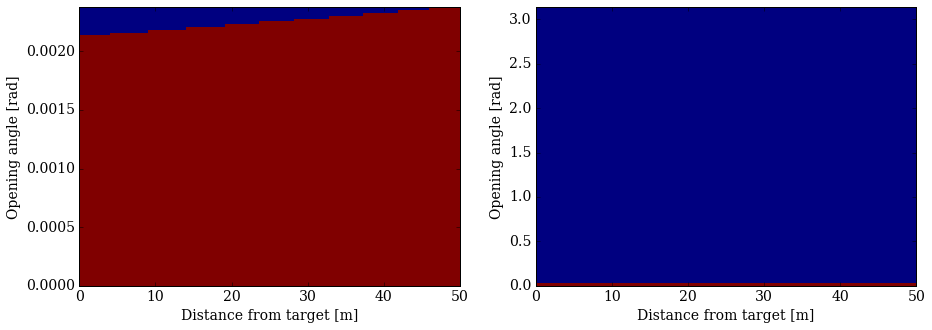

In [10]:
lim1 = (0.,thetaMax)
lim2 = (0.,np.pi)

lRange = np.linspace(0,50,100)
thetaRange1 = np.linspace(lim1[0],lim1[1],100)
thetaRange2 = np.linspace(lim2[0],lim2[1],100)

l1, theta1 = np.meshgrid(lRange,thetaRange1)
l2, theta2 = np.meshgrid(lRange,thetaRange2)
proj1 = ProjectionFunction(l1,theta1)
proj2 = ProjectionFunction(l2,theta2)

fig = plt.figure(figsize=figsize)
fig.add_subplot(121)
plt.pcolormesh(l1,theta1,proj1)
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.ylim(lim1)
fig.add_subplot(122)
plt.pcolormesh(l2,theta2,proj2)
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.ylim(lim2)

plt.show()